In [1]:
import sys
import os
import torch
import numpy as np
import matplotlib.pyplot as plt

# hacky way to import modules from ../src
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/src")

from classification import Classification, ClassificationNet

## Classification network architecture

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

net = ClassificationNet().to(device)
net

ClassificationNet(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): Dropout(p=0.2, inplace=False)
    (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_fe

Putting BatchNorm after ReLU led to the best results

Train loss = 0.08850331348843045
Test loss = 0.11130762100219727
Train accuracy = 0.9918888888888889
Test accuracy = 0.984


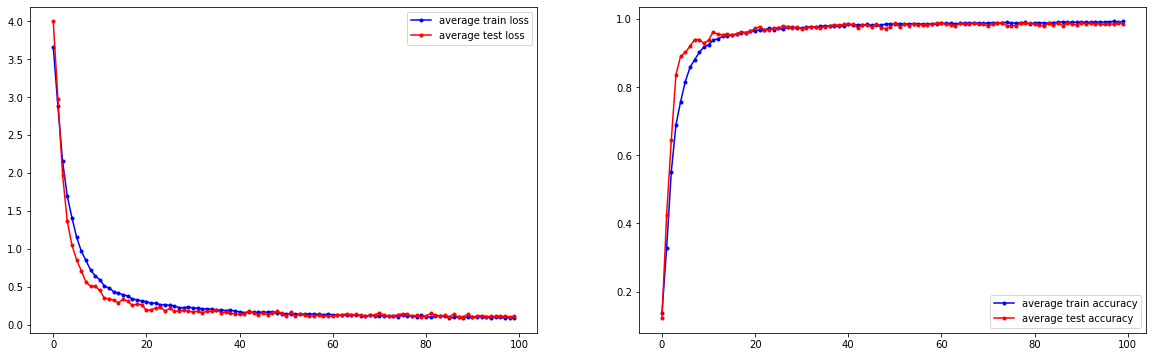

In [3]:
problem = Classification(net, dataset_path="../data/extracted", device=device)

problem.trainer.train(100, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

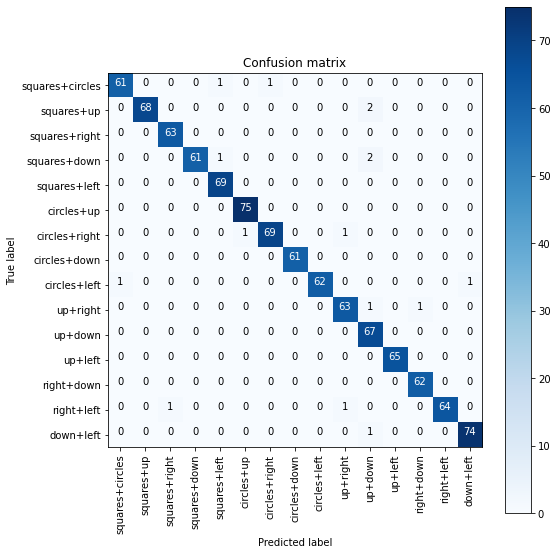

In [4]:
matrix, labels = problem.confusion_matrix(device)
plt.figure(figsize=(8, 8))
problem.plot_confusion_matrix(matrix, labels)

## Other tested architectures

In [5]:
def filter_layer(sequential, layer_type):
    is_not_this_layer = lambda layer: not isinstance(layer, layer_type)
    layer_list = filter(is_not_this_layer, sequential)
    return torch.nn.Sequential(*layer_list)

### No dropout

In [6]:
net_without_dropout = ClassificationNet().to(device)
net_without_dropout.cnn = filter_layer(net_without_dropout.cnn, torch.nn.Dropout)
net_without_dropout.linear = filter_layer(net_without_dropout.linear, torch.nn.Dropout)

net_without_dropout

ClassificationNet(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    (6): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=1152, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01,

Train loss = 0.0062490471071667145
Test loss = 0.17363045501708985
Train accuracy = 1.0
Test accuracy = 0.977


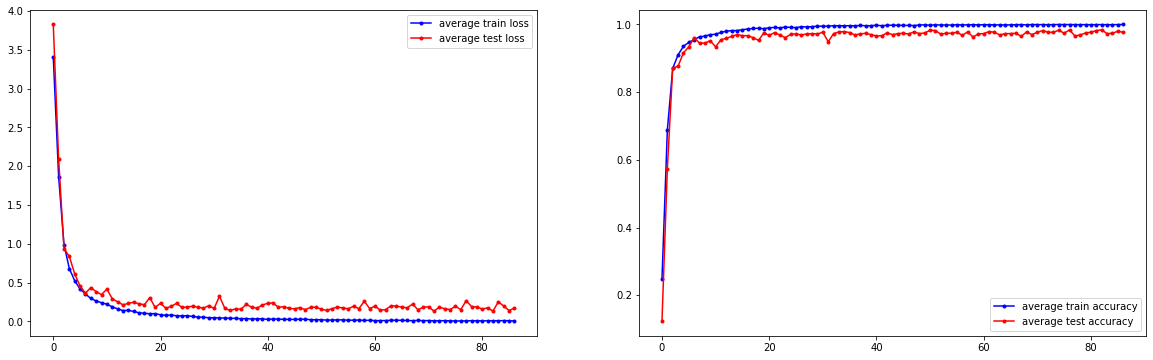

In [7]:
problem = Classification(net_without_dropout, dataset_path="../data/extracted", device=device)

problem.trainer.train(100, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

**Result:** network started to overfit

### No batch normalization

In [8]:
net_without_batchnorm = ClassificationNet().to(device)
net_without_batchnorm.cnn = filter_layer(net_without_batchnorm.cnn, torch.nn.BatchNorm2d)
net_without_batchnorm.linear = filter_layer(net_without_batchnorm.linear, torch.nn.BatchNorm1d)

net_without_batchnorm

ClassificationNet(
  (cnn): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): Dropout(p=0.2, inplace=False)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Dropout(p=0.2, inplace=False)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear): Sequential(
    (0): Linear(in_features=1152, out_features=64, bias=True)
    (1): LeakyReLU(negative_slope=0.01, inplace=True)
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): LeakyReLU(negative_slope=0.01, inplace=True)
    (5): Dropout(p=0.2,

Train loss = 0.2358871587117513
Test loss = 0.17717538452148437
Train accuracy = 0.97
Test accuracy = 0.975


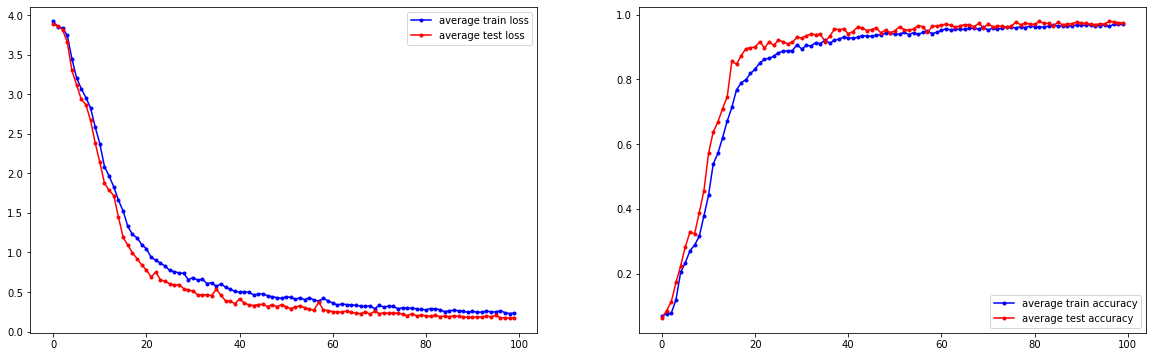

In [9]:
problem = Classification(net_without_batchnorm, dataset_path="../data/extracted", device=device)

problem.trainer.train(100, early_stop=10, verbose=False)

print("Train loss =", problem.trainer.avg_train_losses[-1])
print("Test loss =", problem.trainer.avg_test_losses[-1])
print("Train accuracy =", problem.trainer.avg_train_accuracies[-1])
print("Test accuracy =", problem.trainer.avg_test_accuracies[-1])

problem.trainer.plot()

**Result:** considerably slower training